# Aufgabe 1

- Betrachten Sie die Datei [daten.dat](https://gitlab.gwdg.de/jschulz1/math_prog/raw/master/data/daten.dat). (Laden Sie diese Datei ggf. beim Jupyter-Server hoch, falls Sie diesen benutzen).
- Schreiben Sie ein Programm, das die Daten importiert und plottet.

In [1]:
from numpy import loadtxt
import matplotlib.pyplot as plt

daten = loadtxt('../../data/daten.dat', skiprows=1)

plt.plot(*daten.T)
plt.show()
# Alternative mit mehr Schreibaufwand:
# plt.plot(daten[:,0], daten[:,1])

<Figure size 640x480 with 1 Axes>

# Aufgabe 2
Plotten Sie die Funktion $$ f(x):= 1/(x^2+\sqrt{a}) $$ auf dem Intervall $[-3,3]$ für $a=1, 2, \dots, 20$ und erstellen Sie daraus eine Animation.

creating movie
done


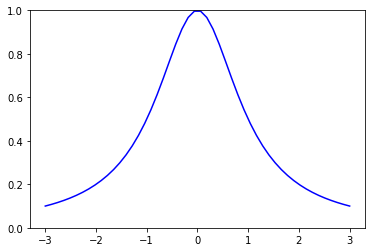

In [2]:
from numpy import linspace, pi, sqrt
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def plotfunc(framenum, x, a):
    plt.clf()
    plt.plot(x, 1./(x**2 + sqrt(a[framenum])), 'b')
    plt.ylim([0, 1])

frames = 50
anim = FuncAnimation(plt.figure(), plotfunc,
                     frames=frames,
                     interval=20,
                     fargs=(linspace(-3, 3, 50), linspace(1, 20, frames)))
    
print('creating movie')
anim.save('params.mp4', writer='ffmpeg', extra_args=['-vcodec', 'h264'])
print('done')

# Aufgabe 3

Lesen sie die Bild-Datei aus der Vorlesung (die Katze unter `grumpy.png`) und schreiben sie ein Programm, welches eine Kantendetektion (*Edge Detection*) mit der Hilfe des [*Sobel-Operators*](https://de.wikipedia.org/wiki/Sobel-Operator) von dem Bild durchführt. Berechnen sie sowohl beide Richtungen als auch die richtungsunabhängige Kantendetektion.

*Hinweis*: Bei der in dem verlinkten Artikel verwendeten `*`-Operation handelt es sich *nicht* um die elementweise Multiplikation der Arrays, sondern um eine *Faltung*. Der [Wikipedia-Artikel](https://de.wikipedia.org/wiki/Faltungsmatrix) hat zu diesem Konzept hilfreiche Erklärungen und Animationen. Zum Lösen der Aufgabe können Sie für die Faltung die Bibliotheks-Funktion

```python
scipy.signal.convolve2d
```

nutzen.

*Bonus*: Implementieren sie die Faltung selbst. Falls der 2d-Fall zu unübersichtlich ist, können Sie auch eine 1d-Faltung implementieren.

In [3]:
from numpy import array
from scipy.signal import convolve2d

def sobel(img):
    sobel_x = array([[1,0,-1],
                     [2,0,-2],
                     [1,0,-1]])
    sobel_y = array([[1,2,1],
                     [0,0,0],
                     [-1,-2,-1]])
    edge_x = convolve2d(img, sobel_x, mode='valid')
    edge_y = convolve2d(img, sobel_y, mode='valid')
    edge = sqrt(edge_x**2 + edge_y**2)
    return edge_x, edge_y, edge

/nix/store/407jvx71lkz00np1wbks3m8xi7hv02f0-python3-3.6.6-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


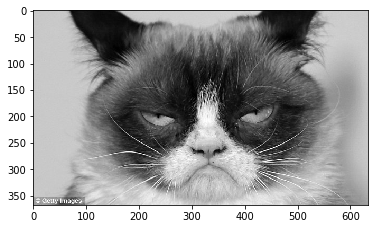

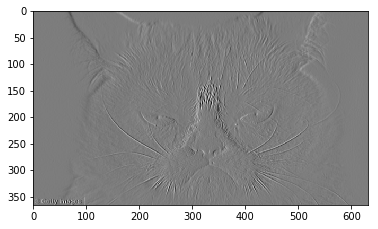

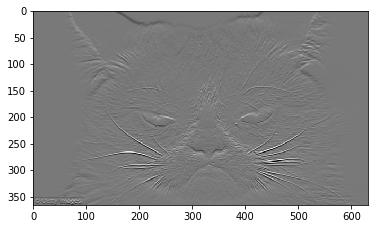

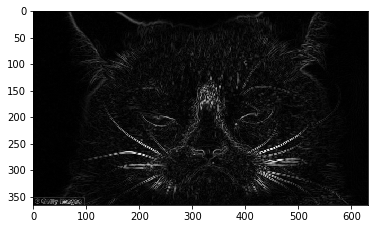

In [4]:
from scipy.misc import imread
import matplotlib.pyplot as plt

image = imread('../../images/grumpy.jpg', flatten=True)
plt.imshow(image, cmap='gray')
plt.show()

edge_x, edge_y, edge = sobel(image)

plt.imshow(edge_x, cmap='gray')
plt.show()
plt.imshow(edge_y, cmap='gray')
plt.show()
plt.imshow(edge, cmap='gray')
plt.show()

In [5]:
# Implementierung der Faltung. Hier wird nur der `mode='valid'`-Fall implementiert,
# für den kein Padding nötig ist.

def conv(img, kernel):
    imgx, imgy = img.shape
    kernx, kerny = kernel.shape 
    resx, resy = imgx-kernx+1, imgy-kerny+1
    result = zeros((resx, resy))
    for i in range(resx):
        for j in range(resy):
            result[i, j] = (img[i:i+kernx, j:j+kerny] * kernel).sum()
    return result

In [6]:
# Der Vollständigkeit halber: reine Numpy-Implementierung, ohne for-Schleifen. Deutlich schneller als
# die obige Variante, aber schwerer zu verstehen.

from numpy.lib.stride_tricks import as_strided

def conv(img, kernel):
    imgx, imgy = img.shape
    kernx, kerny = kernel.shape 
    resx, resy = imgx-kernx+1, imgy-kerny+1
    subimgs = as_strided(img, shape=(resx, resy, kernx, kerny), 
                              strides=img.strides+img.strides)
    return (subimgs * kernel[None, None, :, :]).sum(axis=(2, 3))